# Projet Numérique : Dynamique Quantique

## Résolution en états stationnaire 

Numba : a voir vers la fin
http://www.enit.rnu.tn/fr/Minds/quant/amphi6MQ.pdf pour explication sin et cos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special
from scipy import constants
import math

#Nous faisons les calculs pour 1000 points
N = 1000
L = 20

dx = L/N

print("dx : ", dx)

## On initialise x tel que 

x = np.linspace(-L/2,L/2,N)

dx :  0.02


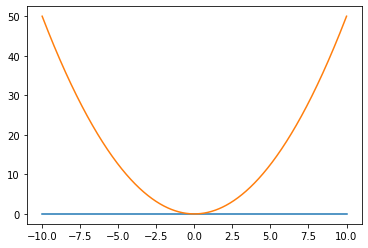

In [2]:

# On commence par former la liste de valeurs des vecteurs et V.

V = np.zeros(N) #potentiel nul
V2 = np.zeros(N) #potentiel harmonique

omega =1
masse = 1
hbarre = 1

for i in range(N):
    V2[i] = masse*(omega*x[i])**2 / 2

plt.plot(x,V)
plt.plot(x,V2)

plt.show()

In [3]:
## Ensuite, on forme les matrices d et e diagonales principale et supérieure (resp) de H

def get_matrice(V):

    d = np.zeros(N)
    e= np.zeros(N-1)

    for i in range(V.size):
        d[i] = 2/(dx**2) + V[i]

    for i in range(e.size):
        e[i] = -1/(dx**2)
        
    return d,e

d,e = get_matrice(V)


In [4]:
from scipy.linalg import eigh_tridiagonal

## Puis, on calcule w et v respectivement les valeurs propres et vecteurs propres de H

w, v = eigh_tridiagonal(d,e)

In [5]:
# On doit désormais normaliser les vecteurs propres :

def normalize(m, dx):
    m /= np.linalg.norm(m,axis=0)
    m /= np.sqrt(dx)
    return m

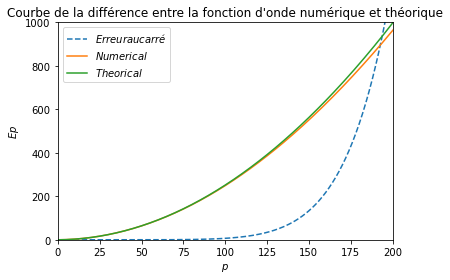

In [6]:
## On regarde la différence entre la courbe théorique et la courbe obtenu

p = np.arange(0,N,1)

Ep = np.zeros(N)
for i in range(N):
    Ep[i] = (np.pi*(i+1)/L)**2
    
#Pour voir plus distinctement la différence entre la courbe numérique et théorique, nous la mettons au carré
R = (Ep-w)**2

plt.plot(p,R,"--",label="$Erreur au carré$")    
plt.plot(p,w,label="$Numerical$")
plt.plot(p,Ep,label = "$Theorical$")
plt.title('Courbe de la différence entre la fonction d\'onde numérique et théorique')
plt.xlabel('$p$')
plt.ylabel('$Ep$')
plt.xlim(0, 200)
plt.ylim(0, 1000)
plt.legend()
plt.savefig('etat_stationnaire/document/energie_num_vs_theoric_n%.i.pdf' %N,format='pdf')
plt.savefig('etat_stationnaire/document/energie_num_vs_theoric_n%.i' %N)
plt.show()

In [7]:
# On calcule le psi théorique pour le potentiel puit infini

def psi_theo(p):
    psi_theo = np.zeros(N)
    for i in range(N):
        if (p%2 == 0): #fonction pair
            psi_theo[i] = np.sqrt(2/L)*np.cos(((p+1)*np.pi*x[i])/L+p/2*np.pi)
        else: #fonction impair
            psi_theo[i] = np.sqrt(2/L)*np.sin(((p+1)*np.pi*x[i])/L)
    return psi_theo


def energie_pot(p,w):
    value_ep = np.zeros(N)
    for i in range(value_ep.size):
        value_ep[i] = w[p]
    return value_ep

In [8]:
# On crée la fonction pour former psi à partir de V

def get_psi(V):
    d,e = get_matrice(V)
    
    w, v = eigh_tridiagonal(d,e)
    
    for vec in v:
        normalize(v,dx)
    v0 = np.zeros((N,N))
    for i in range(N):
        for y in range(N):            #On échange ligne et colonnes
            v0[i][y] = v[y][i]
    
    return w,v0

# On crée la fonction pour afficher les graphiques

def get_graph(w,v,name,theorical_psi,Ep):
    for i in range(Ep):
        plt.plot(x,v[i]+w[i],label="Numérique $p=%i$" %i)
        plt.plot(x,theorical_psi(i)+w[i],label = "Théorique $p=%i$" %i)
        plt.plot(x,energie_pot(i,w),"--",label = "Ep pour $p=%i$" %i)
    plt.xlabel('$x$')
    plt.ylabel('$\Psi(x)$')
    plt.title('Fonction d\'onde pour un potentiel '+name)
    plt.legend(bbox_to_anchor=(1.05,1.0),loc='upper left')
    plt.savefig('etat_stationnaire/document/%s.pdf' %(name),bbox_inches='tight',format='pdf')
    plt.savefig('etat_stationnaire/document/%s' %(name),bbox_inches='tight')
    plt.show()

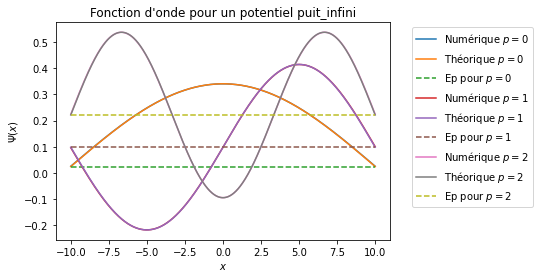

In [9]:
w,v = get_psi(V)
get_graph(w,v,"puit_infini",psi_theo,3)

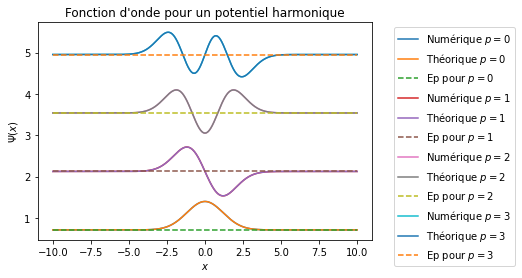

In [10]:
#potentiel harmonique 
def factoriel(x):
    if x <= 0:
        return 1
    else:
        return x*factoriel(x-1)

sigma = np.sqrt(np.sqrt(2.0))

#On calcule la fonction d'onde théorique
def psi_theo_harmo(p,y):
    psi_theo = np.zeros(N)
    p_hermite = special.hermite(p)
    
    for i in range(N):
        psi_theo[i] = (1/(np.sqrt(2**p*factoriel(p)*np.sqrt(np.pi)*sigma)))*np.exp((-(x[i]+y)**2)/(2*sigma**2))*p_hermite((x[i]+y)/sigma)*(-1)**p
    
    return psi_theo

w,v = get_psi(V2)

#Fonction d'onde pour un potentiel harmonique centré en 0
def psi_theo_harmonique(p):
    return psi_theo_harmo(p,0)

get_graph(w,v,"harmonique",psi_theo_harmonique,4)

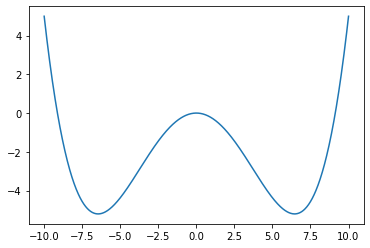

In [11]:
#Double puit

#Définition du potentiel
V4 = np.zeros(N)
a = 0.003
for i in range(N):
    V4[i] = a*(x[i]**4)-(x[i]**2/4)

plt.plot(x,V4)

plt.show()

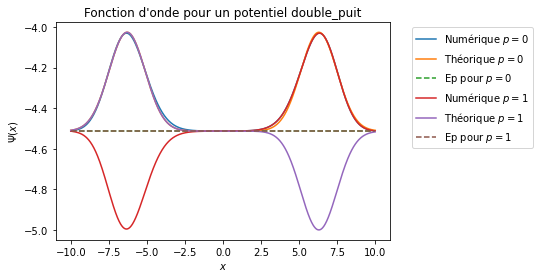

In [12]:
#psi_numerique
w,v = get_psi(V4)

#On calcule la fonction d'onde pour un double potentiel harmonique non couplé
def psi_theo_doublepuits(p):
    psi_theo = np.zeros(N)
    b = 6.3
    harmo_g = psi_theo_harmo(int(round(p/2.1,0)),b)
    harmo_d = psi_theo_harmo(int(round(p/2.1,0)),-b)

    for i in range(N):
        psi_theo[i] = (harmo_g[i]+(-1)**p*harmo_d[i])
        
    
    return normalize(psi_theo,dx)

get_graph(w,v,"double_puit",psi_theo_doublepuits,2)

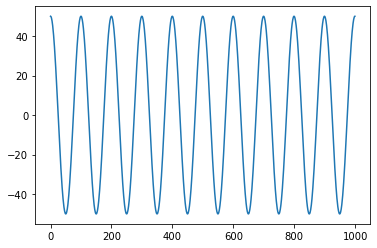

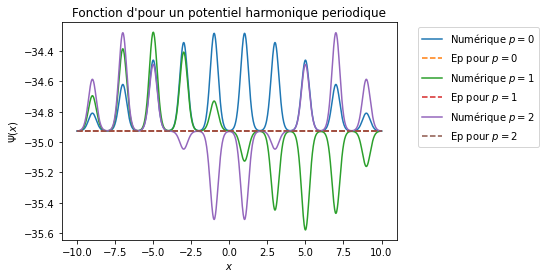

In [13]:
#Potentiel periodique

V6 = np.zeros(N)
Q = 50
d = 1
U = 3
for i in range(N):
    V6[i] = Q*np.cos(x[i]*np.pi/d)

w,v = get_psi(V6)

plt.plot(V6)
plt.show()
for i in range(U):
    plt.plot(x,v[i]+w[i],label="Numérique $p=%i$" %i)
    plt.plot(x,energie_pot(i,w),"--",label = "Ep pour $p=%i$" %i)
plt.xlabel('$x$')
plt.ylabel('$\Psi(x)$')
plt.title('Fonction d\'pour un potentiel harmonique periodique')
plt.legend(bbox_to_anchor=(1.05,1.0),loc='upper left')
plt.savefig('etat_stationnaire/document/%s' %("periodique"),bbox_inches='tight')
plt.show()